In [12]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

from pydd.binary import *

In [15]:
# Intrinsic parameters of astrophysical benchmark
m1 = 1e3 * MSUN
m2 = 1 * MSUN
rho_6 = 0.5e16 * MSUN / PC ** 3
gamma_s = 7 / 3
# Extrinsic parameters
Phi_c = 0.0  # GW phase at coalescence
tT_c = 0.0  # reference time variable at coalescence
dL_iota = get_dL_iota(1e8 * PC, 0.0)  # combination of distance and inclination angle

# Get derived parameters (kind of a mess right now...)
M_chirp = get_M_chirp(m1, m2)
q = m2 / m1
rho_s = get_rho_s(rho_6, m1, gamma_s)
c_f = get_c_f(m1, m2, rho_s, gamma_s)
f_isco = get_f_isco(m1)

# Construct dark dress and vacuum system
dd = DynamicDress(gamma_s, c_f, M_chirp, q, Phi_c, tT_c, dL_iota, f_isco)
vb = VacuumBinary(M_chirp, Phi_c, tT_c, dL_iota, f_isco)

# Get frequency 5 yr before coalescence (first time is slow due to jit)
t_obs_lisa = 5 * YR
f_l = root_scalar(
    lambda f: t_to_c(f, dd) - t_obs_lisa,
    bracket=(1e-3, 1e-1),
    rtol=1e-15,
    xtol=1e-100,
).root

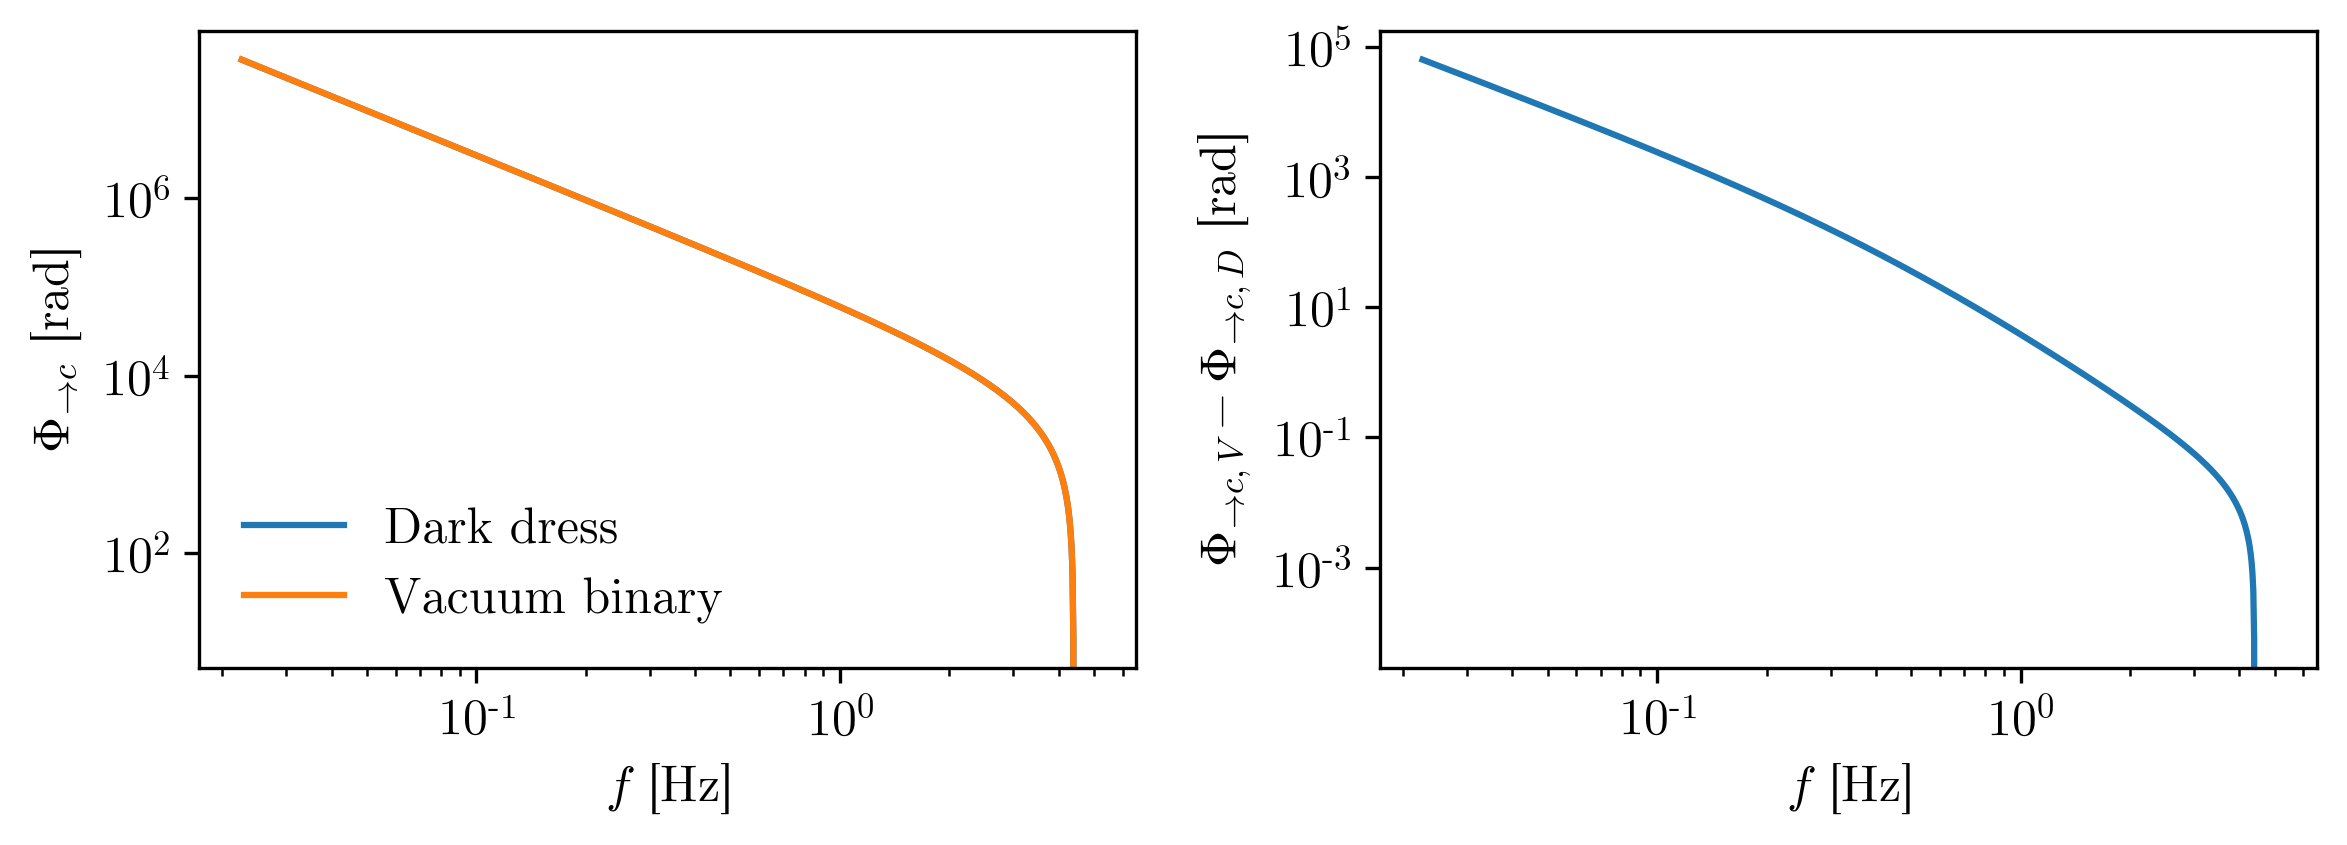

In [24]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
fs = jnp.geomspace(f_l, 5, 1000)
plt.loglog(fs, Phi_to_c(fs, dd), label="Dark dress")
plt.loglog(fs, Phi_to_c(fs, vb), label="Vacuum binary")
plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$\Phi_{\to c}$ [rad]")
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
fs = jnp.geomspace(f_l, 5, 1000)
plt.loglog(fs, Phi_to_c(fs, vb) - Phi_to_c(fs, dd))
plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$\Phi_{\to c,V} - \Phi_{\to c,D}$ [rad]")

plt.tight_layout()